A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

You are required to model the price of houses with the available independent variables. 
* This model will then be used by the management to understand how exactly the prices vary with the variables. 
* They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
* Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The assigment will focus more on Ridge and Lasso modelling rather than the Linear Regression model.

## House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 1460 rows, 81 columns, certain columns have 
# null values, and potentially be treated.
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#head
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Describe for outlier observation
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


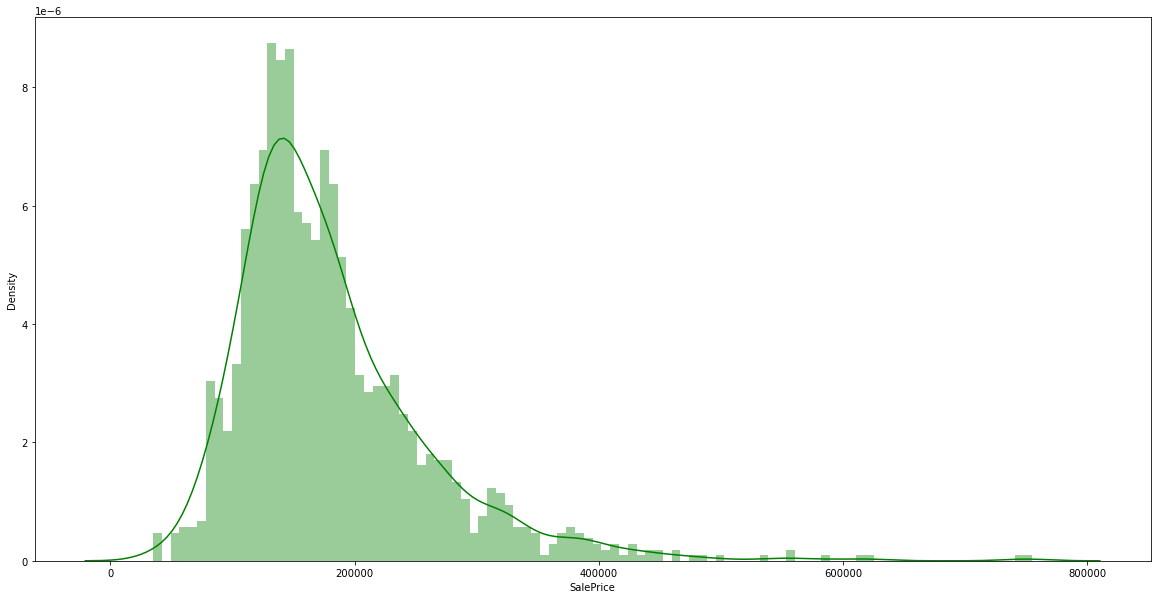

In [6]:
# Let's also look at how the SalesPrice(Target/dependent/response variable) 
# is distributed

print(housing['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.distplot(housing['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [7]:
# Duplicate checks
# Identify duplicate instant records in the data set
housing['Id'].nunique()

# Results: All instants are unique (1460 of 1460 ). It can be infered that
# there are no duplicate records currently in the data set which needs to be merged

1460

In [8]:
#Additional duplicate checks
housing_dup = housing.drop(["Id"],axis =1)
housing_dup[housing_dup.duplicated() == True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### Observation 

* There are 1460 rows in the data set and 81 columns
* There are a number of missing/null values in the independent variables and would have to be further dealt in the Data cleaning section
* The presence of outliers are also observed, which will be further dealt in the Data cleaning section.
* There are no duplicate records in the data set.
* Sales price is right tailed/skewed and we will have to normalise it in later sections by getting rid of the outliers.

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [9]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Here, although some of the variables are numeric (int), we'd rather treat them as categorical since they have discrete values. Also, we do not want 'Id' column.

In [10]:
# dropping the categorical variable and Id 
housing_numeric = housing_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold', 'YrSold','Id'], axis=1)
housing_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageArea'}>],
       [<AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'3SsnPorch'}>],
       [<AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'PoolArea'}>,
        <AxesSubplot:title={'center':'MiscVal

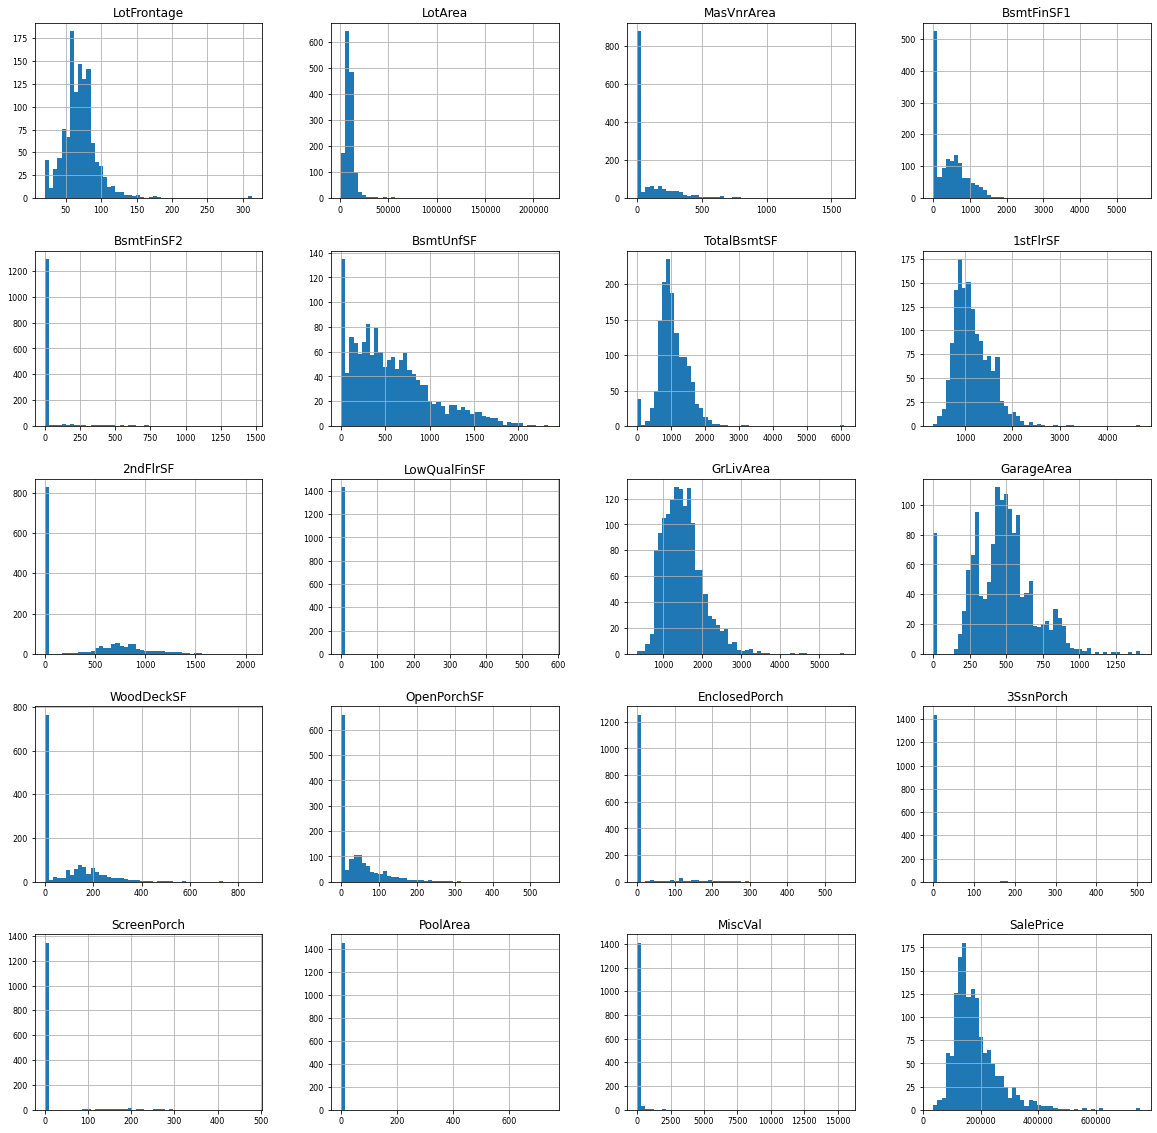

In [11]:
#Let's look at the disrtribtion of all the numeric features - Using histogram
housing_numeric.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

Some Features like lotFrontage,TotalBSmtSF, GrLiveArea,,IstFlrSF seems to have a similar distribution pattern to SalePrice.

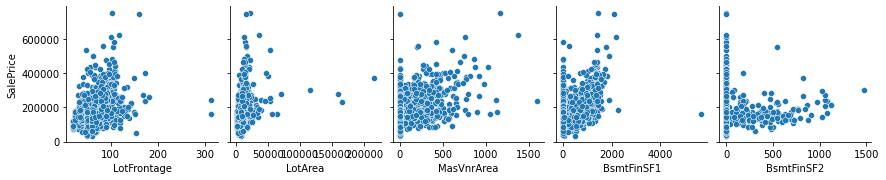

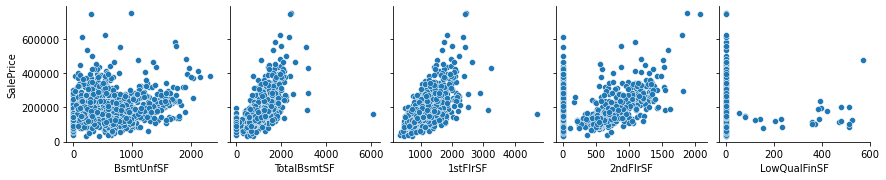

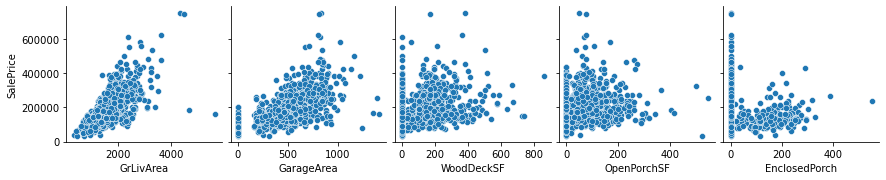

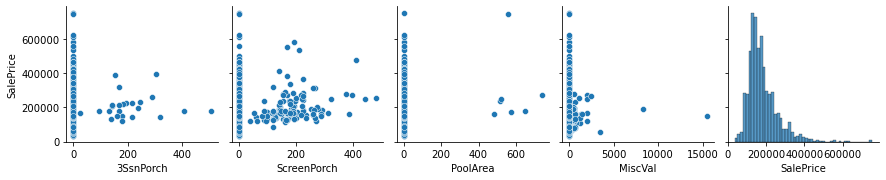

In [12]:
# Let's also look at the pattern of these variables with respect to 
# SalePrice

for i in range(0, len(housing_numeric.columns), 5):
    sns.pairplot(data=housing_numeric,
                x_vars=housing_numeric.columns[i:i+5],
                y_vars=['SalePrice'])

In [13]:
# Alternatively drawing a line through the scatter plot
numeric_features = list(housing_numeric.columns.values)
print("The Column Header :", numeric_features)

The Column Header : ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


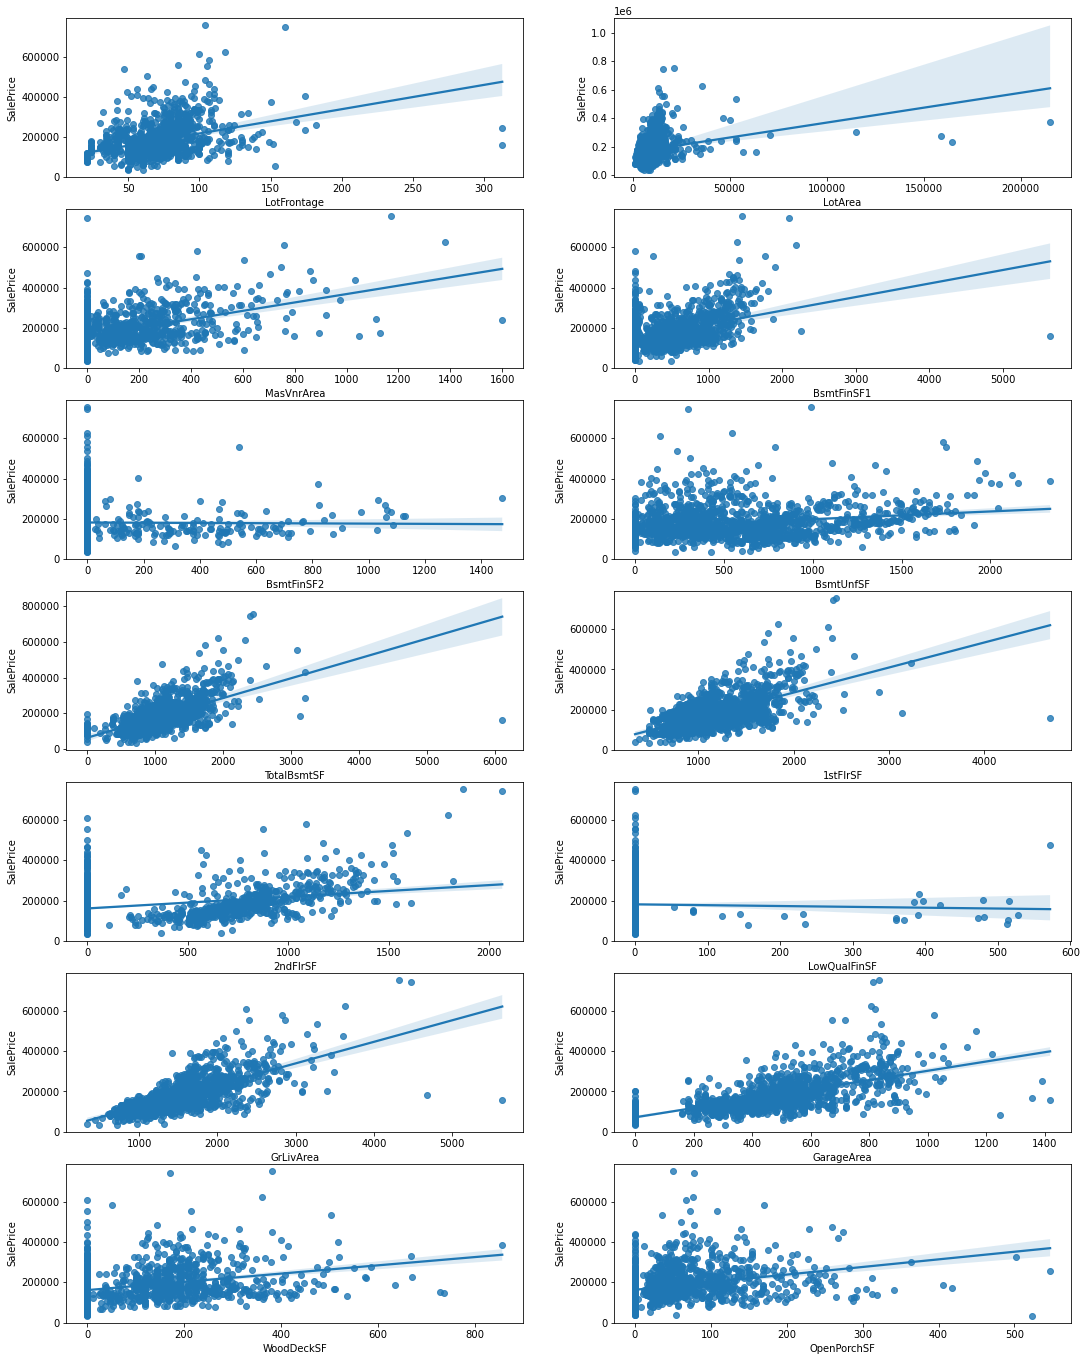

In [14]:
fig, ax = plt.subplots(round(len(numeric_features) / 3), 2, figsize = (18, 24))

for i, ax in enumerate(fig.axes):
    if i < len(numeric_features) - 1:
        sns.regplot(x=numeric_features[i],y='SalePrice', data=housing_numeric[numeric_features], ax=ax)

Many of the attributes seem to have a linear relationship with SalePrice such as GrLivArea, GarageArea

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [15]:
# correlation matrix
cor = housing_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


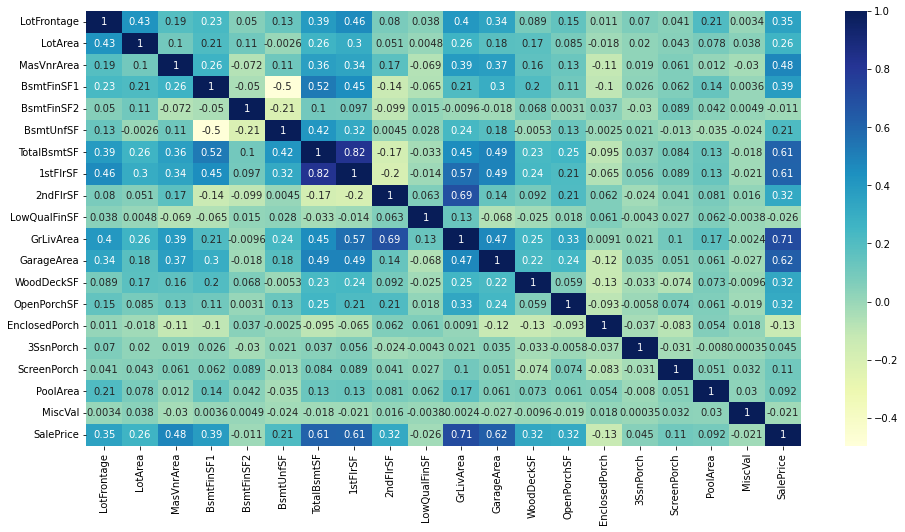

In [16]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


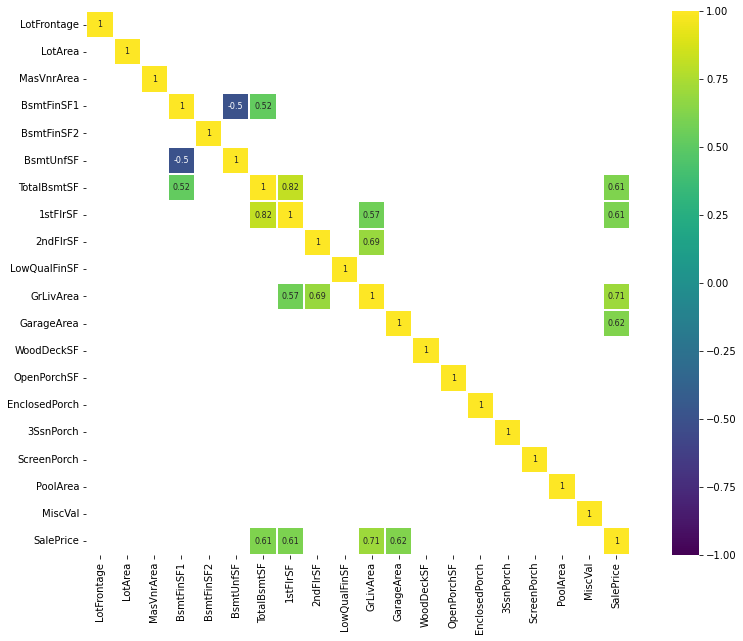

In [17]:
#alternate was to depict co-relation
plt.figure(figsize=(15, 10))

sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Observations

The heatmap shows some useful insights:

Correlation of Saleprice with independent variables:
- SalePrice is fairly (positively) correlated with GrLivArea(0.71), GarageArea(0.62), TotalBsmtSF (0.61) and 1stFlrSF(0.61)

- SalePrice does not show a strong negative correlattion to any of the indepenent variables

Correlation among independent variables:
- Some independent variables are fairly correlated e.g. GrLivArea and 2ndFlrSF (0.69), TotalBsmtSF and 1stFlrSF (0.82)


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

In [18]:
# converting some of the previously indentified numerical variables 
# into categorical variables.

housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype('object')
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype('object')
housing['FullBath'] = housing['FullBath'].astype('object')
housing['HalfBath'] = housing['HalfBath'].astype('object')
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype('object')
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype('object')
housing['TotRmsAbvGrd'] = housing['TotRmsAbvGrd'].astype('object')
housing['Fireplaces'] = housing['Fireplaces'].astype('object')
housing['GarageCars'] = housing['GarageCars'].astype('object')
#housing['MoSold'] = housing['MoSold'].astype('object')


In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [20]:
# all categorical variables in the dataset
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,2,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,3,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,3,TA,TA,Y,NaN,NaN,NaN,WD,Normal


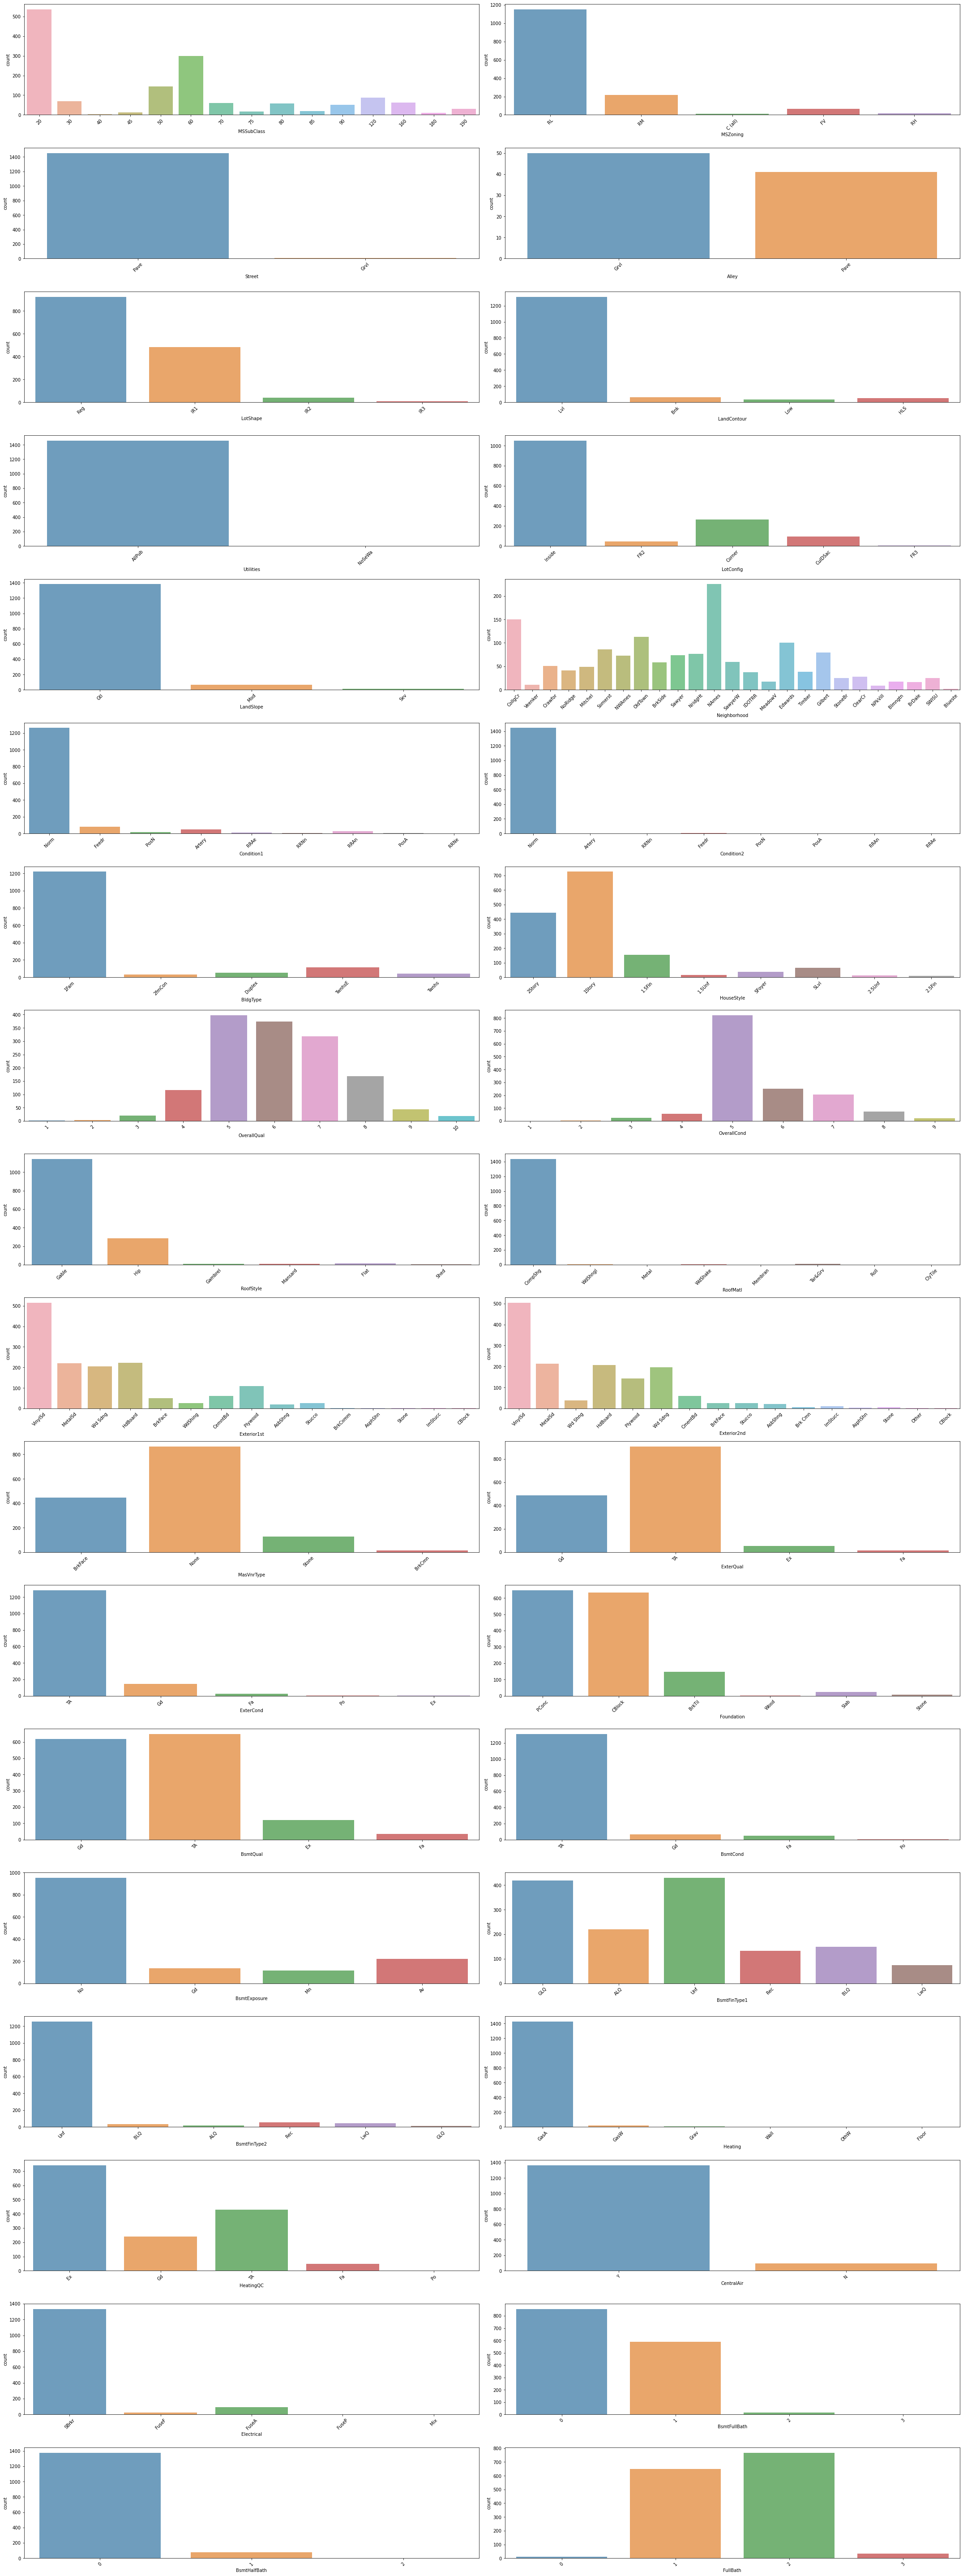

In [21]:
# boxplot/countplot of all the categorical variables
fig, axes = plt.subplots(round(len(housing_categorical.columns) / 3), 2, figsize=(30, 80))

for i, ax in enumerate(fig.axes):
    if i < len(housing_categorical.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=housing_categorical.columns[i], alpha=0.7, data=housing_categorical, ax=ax)

fig.tight_layout()

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen earlier that there are missing values in the dataset. We've also seen that some numerical variables should rather be a categorical variable (so that dummy variable are created for the categories).

Note that they *can* be used in the model as a numeric variable also. 



### Missing Value Treatment

In [22]:
#show all columns that have null values

housing.isna().sum()[housing.isna().sum() > 0]


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [23]:
# Show percentage of null values

round(100*(housing.isnull().sum()[housing.isnull().sum() > 0]/len(housing.index)), 2).sort_values(ascending=False)


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

We will impute the null values in order to minimise the data loss and also drop certain columns where the missing values are high and not relevant to the model.

In [24]:
#imputing missing values 

housing['LotFrontage'].fillna(0, inplace = True)
housing['Alley'].fillna('No Alley', inplace = True)
housing['MasVnrType'].fillna('None', inplace = True)
housing['MasVnrArea'].fillna(0, inplace = True)
housing['BsmtQual'].fillna('No Basement', inplace = True)
housing['BsmtCond'].fillna('No Basement', inplace = True)
housing['BsmtExposure'].fillna('No Basement', inplace = True)
housing['BsmtFinType1'].fillna('No Basement', inplace = True)
housing['BsmtFinType2'].fillna('No Basement', inplace = True)
housing['Electrical'].fillna('SBrkr', inplace = True)
housing['FireplaceQu'].fillna('No Fireplace', inplace = True)
housing['GarageType'].fillna('No Garage', inplace = True)
housing['GarageYrBlt'].fillna(2010, inplace = True) # used the max value of YearSold
housing['GarageFinish'].fillna('No Garage', inplace = True)
housing['GarageQual'].fillna('No Garage', inplace = True)
housing['GarageCond'].fillna('No Garage', inplace = True)
housing['PoolQC'].fillna('No Pool', inplace = True)
housing['Fence'].fillna('No Fence', inplace = True)


In [25]:
# Drop this column since this column has over 95% missing values and 
# remaining data seems irrelevant to the model

housing = housing.drop('MiscFeature', axis = 1)

In [26]:
# Show percentage of null values. 
# All missing values should have been addressed. Query should return no records

round(100*(housing.isnull().sum()[housing.isnull().sum() > 0]/len(housing.index)), 2)


Series([], dtype: float64)

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [28]:
# Instead of using the age column as-is ,We will use these column to derieve the 
# HouseAge, GarageAge and the RemodAge

housing['HouseAge'] = housing['YrSold'] - housing['YearBuilt']
housing['GarageAge'] = housing['YrSold'] - housing['GarageYrBlt']
housing['RemodAge'] = housing['YrSold'] - housing['YearRemodAdd']

In [29]:
# Let's drop the Year columns as the won't play any further role in 
# the model and have been substituted with relevant Age columns

housing = housing.drop(['YearBuilt','YrSold','YearRemodAdd','GarageYrBlt'], axis = 1)


In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

### Outlier Treatment

In [31]:
#Descibe the numeric data variables with percentiles
housing_numeric.describe(percentiles=[.1,.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
10%,44.000000,5000.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106475.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000


In [32]:
# Quartile deviation

q1 = housing_numeric.describe().loc['25%']
q3 = housing_numeric.describe().loc['75%']

InterQuartile_deviation = (q3 - q1)
InterQuartile_deviation



LotFrontage         21.00
LotArea           4048.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
SalePrice        84025.00
dtype: float64

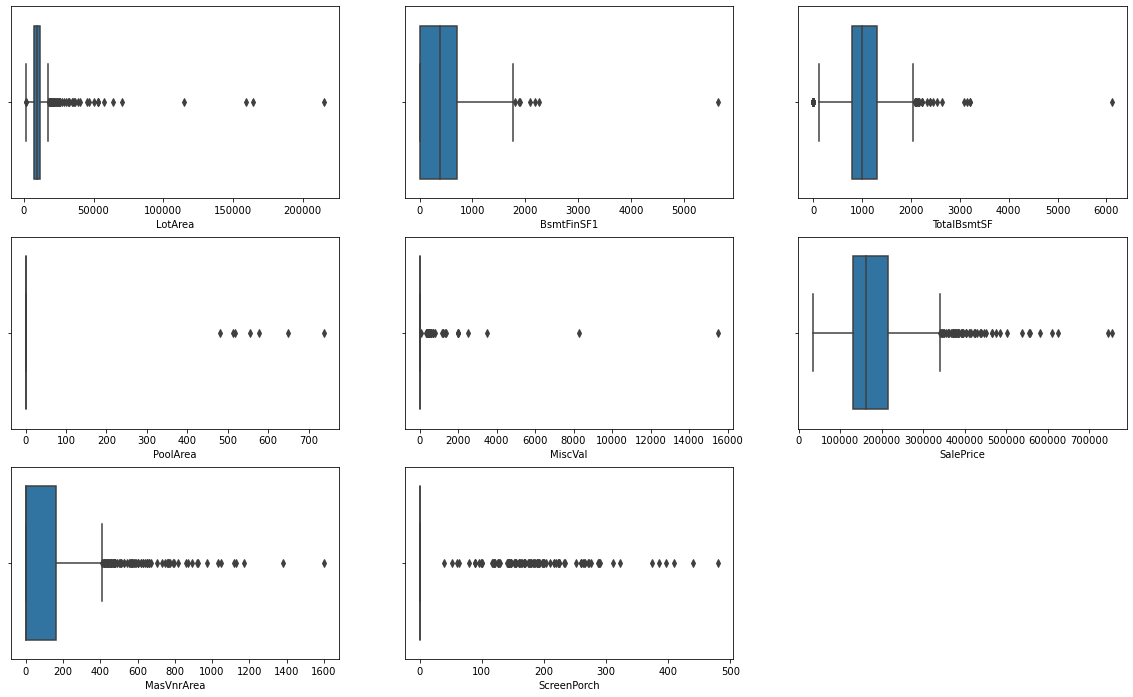

In [33]:
#Let's observe the outliers with a box plot
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(housing['LotArea'])
plt.subplot(3,3,2)
sns.boxplot(housing['BsmtFinSF1'])
plt.subplot(3,3,3)
sns.boxplot(housing['TotalBsmtSF'])
plt.subplot(3,3,4)
sns.boxplot(housing['PoolArea'])
plt.subplot(3,3,5)
sns.boxplot(housing['MiscVal'])
plt.subplot(3,3,6)
sns.boxplot(housing['SalePrice'])
plt.subplot(3,3,7)
sns.boxplot(housing['MasVnrArea'])
plt.subplot(3,3,8)
sns.boxplot(housing['ScreenPorch'])
plt.show()

#### Removing outliers

In [34]:
# Removing outlier using IQR for this attribute
Q1 = housing['LotArea'].quantile(0.25)
Q3 = housing['LotArea'].quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing['LotArea'] >= Q1 - 1.5*IQR) & 
                      (housing['LotArea'] <= Q3 + 1.5*IQR)]
housing.shape

(1391, 79)

In [35]:
# Removing outlier using IQR for this attribute
Q1 = housing['BsmtFinSF1'].quantile(0.25)
Q3 = housing['BsmtFinSF1'].quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing['BsmtFinSF1'] >= Q1 - 1.5*IQR) & 
                      (housing['BsmtFinSF1'] <= Q3 + 1.5*IQR)]
housing.shape

(1386, 79)

In [36]:
# Removing outlier using IQR for this attribute
Q1 = housing['TotalBsmtSF'].quantile(0.25)
Q3 = housing['TotalBsmtSF'].quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing['TotalBsmtSF'] >= Q1 - 1.5*IQR) & 
                      (housing['TotalBsmtSF'] <= Q3 + 1.5*IQR)]
housing.shape

(1326, 79)

In [37]:
# Since we have only 7 PoolArea records and the IQR observed above is zero, we will drop the PoolArea 
# column instead of using IQR or imputing it. This will also prevent data loss (rows)
housing = housing.drop ('PoolArea', axis = 1)
housing.shape

(1326, 78)

In [38]:
# Dropping the MiscVal column instead of using IQR to prevent data 
# loss (rows)
housing = housing.drop ('MiscVal', axis = 1)
housing.shape

(1326, 77)

In [39]:
# In order to prevent data loss,We will impute the outlier data to 
# the nearest 99th percentile instead of IQR

q99 =  housing['MasVnrArea'].quantile(0.99)
print(q99)
housing['MasVnrArea'] = housing['MasVnrArea'].apply(lambda x: x if x <= q99 else q99 )
housing.shape

663.0


(1326, 77)

In [40]:
housing.ScreenPorch.info()

<class 'pandas.core.series.Series'>
Int64Index: 1326 entries, 0 to 1459
Series name: ScreenPorch
Non-Null Count  Dtype
--------------  -----
1326 non-null   int64
dtypes: int64(1)
memory usage: 20.7 KB


In [41]:
# Since the IQR observed for Screen porch is zero, we will drop the ScreenPorch 
# column instead of using IQR or imputing it. This will also prevent data loss (rows)
housing = housing.drop ('ScreenPorch', axis = 1)
housing.shape

(1326, 76)

In [42]:
# In order to prevent data loss,We will impute the outlier data to 
# the nearest 99th percentile instead of IQR

q99 =  housing['SalePrice'].quantile(0.99)
print(q99)
housing['SalePrice'] = housing['SalePrice'].apply(lambda x: x if x <= q99 else q99 )
housing.shape

392375.0


(1326, 76)

<AxesSubplot:>

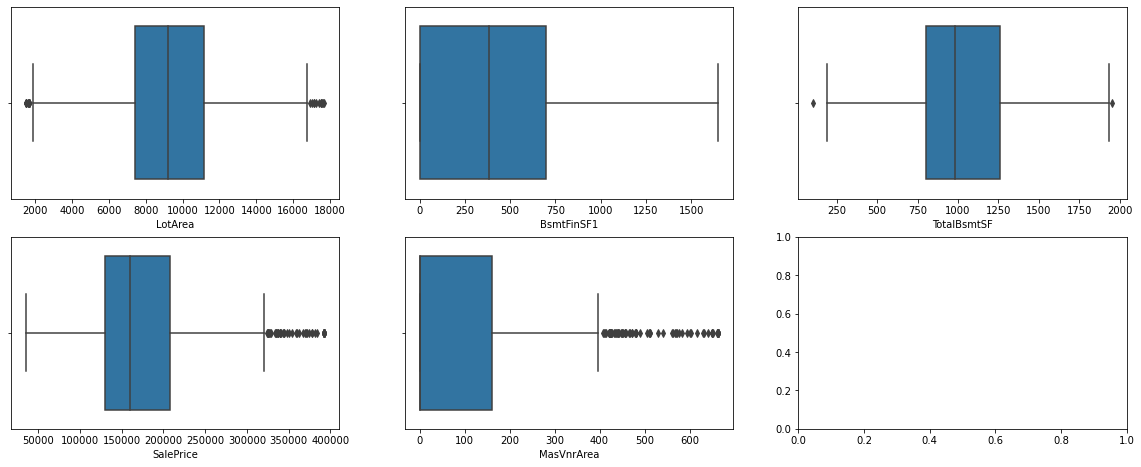

In [43]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(housing['LotArea'])
plt.subplot(3,3,2)
sns.boxplot(housing['BsmtFinSF1'])
plt.subplot(3,3,3)
sns.boxplot(housing['TotalBsmtSF'])
plt.subplot(3,3,4)
sns.boxplot(housing['SalePrice'])
plt.subplot(3,3,5)
sns.boxplot(housing['MasVnrArea'])
plt.subplot(3,3,6)


In [44]:
#Descibe the numeric data variables with percentiles
housing_numeric.describe(percentiles=[.1,.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
10%,44.000000,5000.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106475.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000


In [45]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1326 non-null   int64  
 1   MSSubClass     1326 non-null   object 
 2   MSZoning       1326 non-null   object 
 3   LotFrontage    1326 non-null   float64
 4   LotArea        1326 non-null   int64  
 5   Street         1326 non-null   object 
 6   Alley          1326 non-null   object 
 7   LotShape       1326 non-null   object 
 8   LandContour    1326 non-null   object 
 9   Utilities      1326 non-null   object 
 10  LotConfig      1326 non-null   object 
 11  LandSlope      1326 non-null   object 
 12  Neighborhood   1326 non-null   object 
 13  Condition1     1326 non-null   object 
 14  Condition2     1326 non-null   object 
 15  BldgType       1326 non-null   object 
 16  HouseStyle     1326 non-null   object 
 17  OverallQual    1326 non-null   object 
 18  OverallC

count      1326.000000
mean     175179.610860
std       65958.841271
min       34900.000000
25%      130000.000000
50%      160100.000000
75%      207500.000000
max      392375.000000
Name: SalePrice, dtype: float64


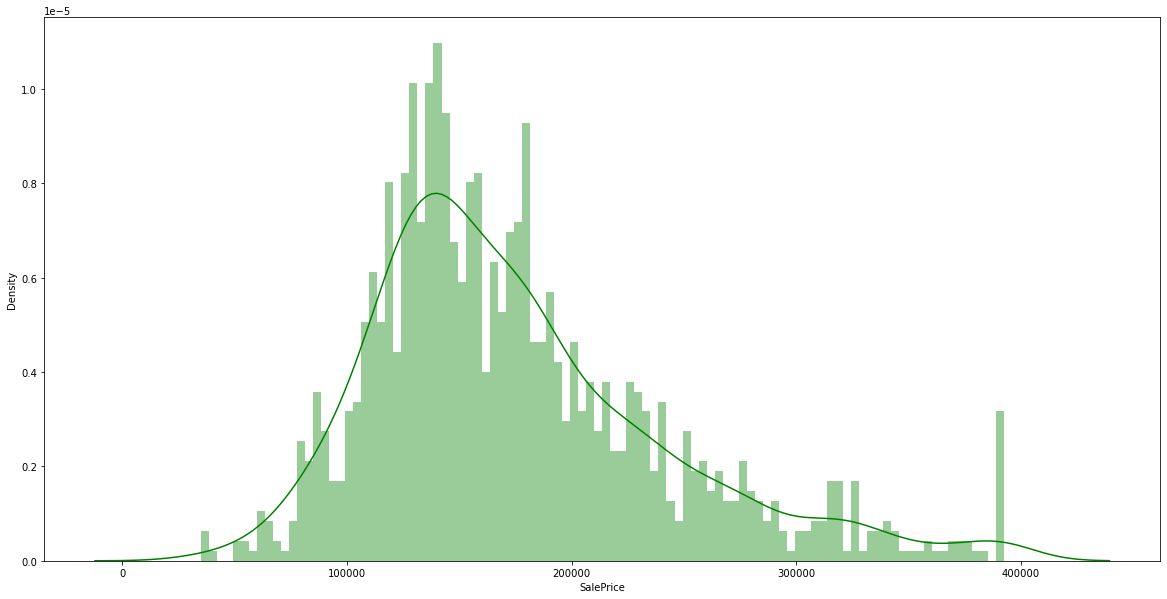

In [46]:
# Let's relook at how the SalesPrice(Target/dependent variable) 
# are distributed after the outlier treatment

print(housing['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.distplot(housing['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [47]:
# split into X and y
# predictors in variable X
X = housing.drop(["SalePrice","Id"],axis =1)
# response variable in Y
y = housing["SalePrice"]

In [48]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [49]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [50]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [51]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [52]:
X.head()
# All attributes should have numerical values

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


In [53]:
X.info()
# All attributes should have numerical values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1459
Columns: 291 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(17), uint8(271)
memory usage: 568.5 KB


In [54]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [55]:
# scaling the features - necessary before using Ridge or Lasso

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [56]:
# Since SalePrice is lightly skewed, let's also apply the log scale to the target variable 
y = np.log(y)

In [57]:
y.head()
# All values should be scaled

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

count    1326.000000
mean       12.006425
std         0.368355
min        10.460242
25%        11.775290
50%        11.983554
75%        12.242887
max        12.879973
Name: SalePrice, dtype: float64


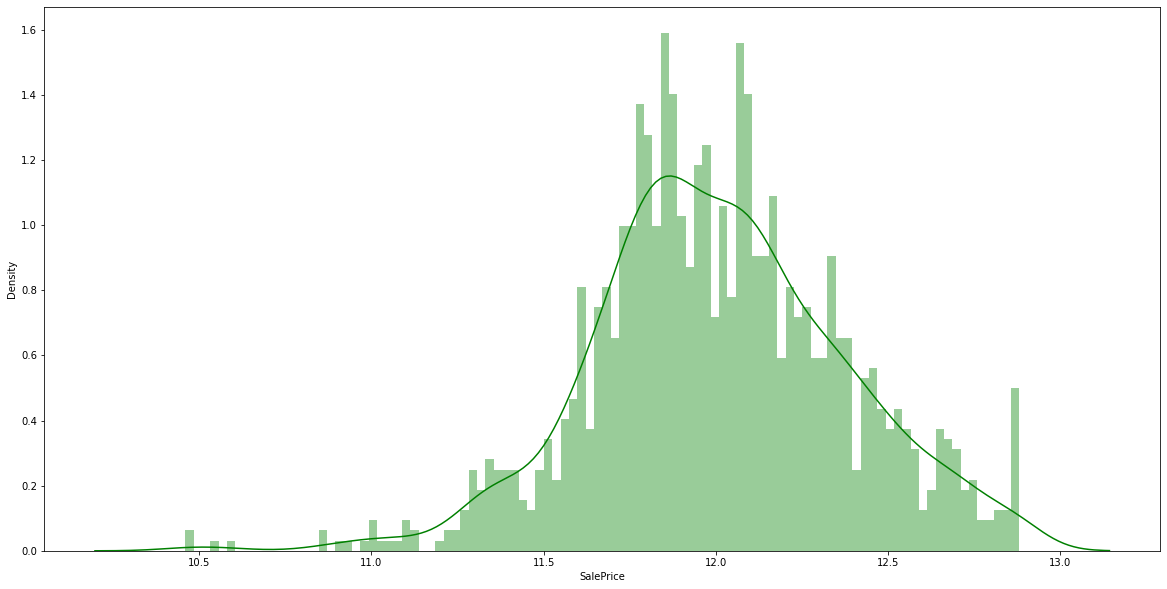

In [58]:
# Let's also look at how the SalesPrice(Target/dependent variable) 
# are distributed after applying the log scale

print(y.describe())
plt.figure(figsize=(20, 10))
sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4});

In [59]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [60]:
X_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,...,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,57.701509,9196.022629,92.539871,431.122845,39.618534,570.046336,1040.787716,1122.821121,339.558190,5.391164,...,0.004310,0.004310,0.068966,0.003233,0.875000,0.003233,0.004310,0.018319,0.826509,0.071121
std,31.618313,3132.176109,151.482678,410.301121,145.789348,423.713326,330.102738,326.067928,423.335325,46.848663,...,0.065547,0.065547,0.253532,0.056796,0.330897,0.056796,0.065547,0.134174,0.378876,0.257165
min,0.000000,1491.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,7500.000000,0.000000,0.000000,0.000000,244.000000,802.750000,872.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,64.000000,9245.500000,0.000000,397.500000,0.000000,486.500000,978.500000,1065.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,78.000000,11071.250000,157.250000,699.250000,0.000000,794.250000,1251.250000,1328.000000,728.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,182.000000,17671.000000,663.000000,1619.000000,1474.000000,1935.000000,1952.000000,2898.000000,1611.000000,528.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
y_train.describe()

count    928.000000
mean      11.998419
std        0.362005
min       10.460242
25%       11.767568
50%       11.979799
75%       12.230765
max       12.879973
Name: SalePrice, dtype: float64

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting house prices, using all the attributes in train dataset using linear regression. Since Ridge and Lasso regression are the primary objective of the assignment, we will not perform any RFE or further regularisation/optimization on this MLR model. It would only be used as a reference to compare the Ridge and Lasso model performance.

In [62]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

10.620271741444125
[-2.66823416e-05  7.25121680e-06 -3.53865543e-05  7.82195863e-05
  3.03226119e-05  1.11622323e-05  1.19704108e-04  4.22881376e-05
  1.06362459e-04  3.75705277e-05  1.86221254e-04  1.46094548e-04
  6.77947748e-05 -7.19046172e-06  3.60961515e-05  1.81190392e-04
 -1.14476131e-04 -1.93754977e-03  3.15378532e-05 -1.05340443e-03
 -6.06910809e-02 -2.72920999e-02 -1.45157240e-01  4.54772949e-02
  5.53672304e-02  8.82476991e-02 -8.73158674e-02 -2.12754480e-02
 -2.50065891e-02 -4.04649949e-02 -4.28110642e-02 -1.01697476e-01
 -7.46682375e-02  6.97464728e-02  4.25220664e-01  3.65339670e-01
  3.67022149e-01  3.69715521e-01  1.74958789e-03 -1.57756527e-02
  6.18663825e-02  2.61089330e-03 -4.44553070e-03  9.30389883e-03
  3.22911224e-02  1.49156289e-02  1.53804587e-02 -9.91020894e-02
  1.35263195e-02 -3.68385797e-02 -3.17440279e-02 -1.61231500e-02
 -4.99678115e-03 -5.94378771e-01  9.60454470e-02  2.03696164e-03
 -3.62270769e-03  3.55188552e-02 -2.01797769e-02  1.23245814e-01
 -6.04

In [64]:
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr :",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr :",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr :",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr :",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr :",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr :",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr : 0.9540363454321992
r2_test_lr : 0.8677532725476753
rss1_lr : 5.583720283545517
rss2_lr : 7.683981919949527
mse_train_lr : 0.006016939960717152
mse_test_lr : 0.01930648723605409


In [66]:
metric

[0.9540363454321992,
 0.8677532725476753,
 5.583720283545517,
 7.683981919949527,
 0.07756893682858591,
 0.13894778600630558]

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [67]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [69]:
# Display tabular results for various alpha values
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022501,0.009945,0.009048,0.003694,0.0001,{'alpha': 0.0001},-0.089052,-0.102946,-0.090515,-0.096262,...,-0.096653,0.006272,26,-0.052440,-0.049201,-0.050266,-0.052436,-0.050868,-0.051042,0.001259
1,0.015876,0.001312,0.006160,0.000209,0.001,{'alpha': 0.001},-0.088922,-0.102653,-0.090443,-0.096154,...,-0.096336,0.006018,25,-0.052447,-0.049209,-0.050292,-0.052445,-0.050890,-0.051057,0.001256
2,0.015050,0.000973,0.006415,0.000205,0.01,{'alpha': 0.01},-0.087747,-0.100557,-0.089818,-0.095261,...,-0.094178,0.004760,24,-0.052504,-0.049270,-0.050477,-0.052514,-0.051108,-0.051175,0.001239
3,0.014866,0.001186,0.006047,0.000630,0.05,{'alpha': 0.05},-0.084440,-0.096218,-0.087884,-0.092782,...,-0.090599,0.004069,23,-0.052673,-0.049591,-0.050893,-0.052727,-0.051500,-0.051477,0.001174
4,0.013398,0.000744,0.006072,0.000812,0.1,{'alpha': 0.1},-0.082071,-0.093523,-0.086197,-0.090730,...,-0.088515,0.003981,21,-0.052909,-0.049986,-0.051311,-0.052928,-0.051745,-0.051776,0.001098
5,0.015042,0.000631,0.006464,0.000643,0.2,{'alpha': 0.2},-0.079475,-0.090264,-0.084036,-0.088393,...,-0.086153,0.003924,19,-0.053324,-0.050543,-0.051939,-0.053303,-0.052188,-0.052259,0.001027
6,0.015109,0.000659,0.005891,0.000262,0.3,{'alpha': 0.3},-0.077936,-0.088073,-0.082689,-0.087295,...,-0.084772,0.003948,18,-0.053678,-0.051010,-0.052419,-0.053623,-0.052611,-0.052668,0.000974
7,0.016101,0.001093,0.006781,0.001168,0.4,{'alpha': 0.4},-0.076860,-0.086577,-0.082062,-0.086503,...,-0.083918,0.004012,17,-0.053999,-0.051417,-0.052797,-0.053918,-0.052990,-0.053024,0.000937
8,0.015511,0.001374,0.005577,0.000456,0.5,{'alpha': 0.5},-0.076118,-0.085431,-0.081589,-0.085928,...,-0.083304,0.004080,16,-0.054273,-0.051777,-0.053112,-0.054191,-0.053348,-0.053340,0.000904
9,0.015377,0.000550,0.005697,0.000230,0.6,{'alpha': 0.6},-0.075571,-0.084635,-0.081361,-0.085418,...,-0.082857,0.004117,15,-0.054507,-0.052099,-0.053384,-0.054437,-0.053669,-0.053619,0.000875


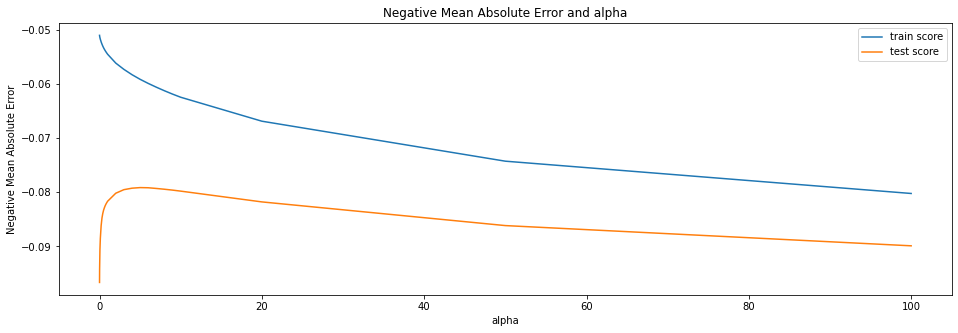

In [70]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [71]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.86277231e-07  8.33789081e-06 -2.55923042e-05  8.64555026e-05
  5.79343345e-05 -3.43044953e-06  1.40959388e-04  5.69367840e-05
  1.25418179e-04 -6.68893860e-06  1.75666041e-04  1.59267784e-04
  6.89178223e-05  9.45563236e-07  5.50579684e-05  1.48727295e-04
 -5.63663297e-04 -2.12440575e-03  2.43909230e-04 -1.30918242e-03
 -3.92207619e-02 -3.56672216e-03  1.21751354e-02  8.24489527e-04
 -5.92513445e-03  4.90976777e-02  1.45285723e-02  4.62965744e-03
 -7.76899737e-03 -1.53286455e-02  2.33912868e-02 -7.17555482e-02
 -1.23575554e-02 -6.16642105e-03  8.47797659e-02  6.14358842e-02
  7.30676691e-02  7.19210709e-02  2.59103219e-02 -1.25013963e-02
  4.15405092e-02  7.38433168e-03 -8.44870464e-03  6.72676755e-03
  1.33136389e-02 -2.47384478e-03  5.89577876e-03 -4.53837956e-03
  1.40626057e-02 -3.08769162e-02 -3.60013705e-03 -1.35114707e-02
 -1.39611056e-02 -4.55287983e-02  8.83897369e-03 -9.68200655e-03
  2.98773432e-02  3.03442099e-02 -8.05532594e-03  1.09171145e-01
 -3.49441359e-02 -1.27344

In [72]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr :",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr :",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr :",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr :",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr : 0.9422659699086128
r2_test_lr : 0.9043479459359545
rss1_lr : 7.013599721418543
rss2_lr : 5.55770768920634
mse_train_lr : 0.0075577583204941194
mse_test_lr : 0.013964089671372713


## Lasso

In [73]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# Printing the best/optimal hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [75]:
# Display tabular results for various alpha values
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.144454,0.047878,0.006474,0.000446,0.0001,{'alpha': 0.0001},-0.076675,-0.081665,-0.079557,-0.080044,...,-0.080152,0.002091,1,-0.055192,-0.053191,-0.054353,-0.055653,-0.054885,-0.054655,0.000845
1,0.029524,0.004218,0.006092,0.000326,0.001,{'alpha': 0.001},-0.081565,-0.078113,-0.080631,-0.087550,...,-0.081946,0.003098,2,-0.068861,-0.070494,-0.069827,-0.070177,-0.070136,-0.069899,0.000561
2,0.019953,0.003059,0.006826,0.000684,0.01,{'alpha': 0.01},-0.103014,-0.103740,-0.104783,-0.105531,...,-0.104092,0.000930,3,-0.100275,-0.100522,-0.098989,-0.100212,-0.099520,-0.099904,0.000565
3,0.068147,0.007605,0.007676,0.002961,0.05,{'alpha': 0.05},-0.106487,-0.105735,-0.106995,-0.108504,...,-0.106582,0.001143,4,-0.102584,-0.103934,-0.102112,-0.102835,-0.103157,-0.102924,0.000609
4,0.053361,0.005840,0.006595,0.000469,0.1,{'alpha': 0.1},-0.106746,-0.105426,-0.107013,-0.109002,...,-0.106670,0.001370,5,-0.102668,-0.104110,-0.102132,-0.103018,-0.103338,-0.103053,0.000663
5,0.053518,0.004069,0.007092,0.000212,0.2,{'alpha': 0.2},-0.107000,-0.105254,-0.106456,-0.109620,...,-0.106821,0.001520,6,-0.103008,-0.104632,-0.102390,-0.103439,-0.103657,-0.103425,0.000742
6,0.056312,0.007028,0.007083,0.000252,0.3,{'alpha': 0.3},-0.107346,-0.104835,-0.105510,-0.109947,...,-0.106839,0.001776,7,-0.103185,-0.104933,-0.102655,-0.103642,-0.104094,-0.103702,0.000779
7,0.050400,0.005921,0.006859,0.000271,0.4,{'alpha': 0.4},-0.108138,-0.104406,-0.104936,-0.110593,...,-0.107152,0.002261,8,-0.103576,-0.105376,-0.103215,-0.103995,-0.104544,-0.104141,0.000760
8,0.048313,0.009108,0.006972,0.000387,0.5,{'alpha': 0.5},-0.108998,-0.104266,-0.104567,-0.111073,...,-0.107557,0.002682,9,-0.104289,-0.106074,-0.104045,-0.104474,-0.105048,-0.104786,0.000724
9,0.037350,0.007990,0.005512,0.000926,0.6,{'alpha': 0.6},-0.110091,-0.104475,-0.104560,-0.111784,...,-0.108231,0.003090,10,-0.105172,-0.106887,-0.105017,-0.105224,-0.105712,-0.105603,0.000683


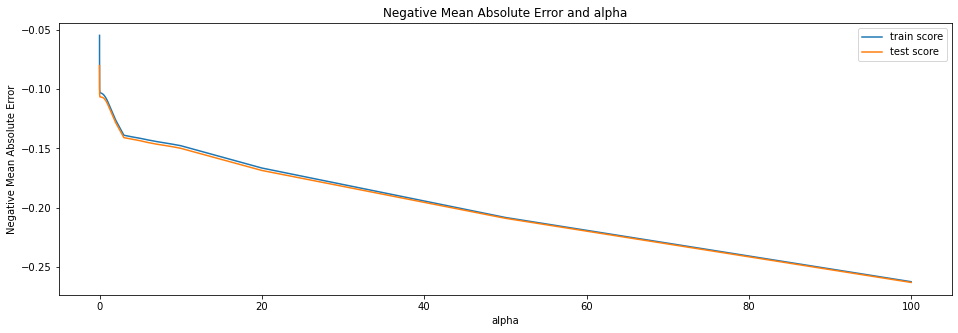

In [76]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [77]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [78]:
lasso.coef_

array([ 8.02971515e-06,  7.73362900e-06, -3.08342631e-05,  1.36588562e-04,
        1.07603958e-04,  6.19508315e-05,  7.61798514e-05,  1.78824541e-04,
        2.51320578e-04,  1.67439022e-04,  4.74796539e-05,  1.68753661e-04,
        7.60458051e-05, -8.03630598e-06,  4.18632257e-05,  1.62644673e-04,
       -1.74579222e-04, -2.06953720e-03,  1.73886383e-04, -1.07816154e-03,
       -5.15139713e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.63872932e-02, -0.00000000e+00,  6.30382312e-03,
       -0.00000000e+00, -3.51820545e-02,  0.00000000e+00, -9.29794824e-02,
       -1.09204422e-03, -0.00000000e+00,  3.20259940e-01,  2.68781809e-01,
        2.77144496e-01,  2.79069763e-01,  0.00000000e+00, -4.71337018e-03,
        5.51683914e-02,  3.85899281e-03, -0.00000000e+00,  8.61486332e-03,
        8.98350773e-03,  0.00000000e+00,  2.48895334e-03, -0.00000000e+00,
        1.04140195e-02, -3.23187754e-02, -0.00000000e+00, -1.65319765e-02,
       -2.97155172e-03, -

In [79]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr :",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr :",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr :",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr :",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr :",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr :",mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr : 0.9499190778031891
r2_test_lr : 0.9034111957913653
rss1_lr : 6.083890929005775
rss2_lr : 5.612136039254763
mse_train_lr : 0.006555916949359671
mse_test_lr : 0.014100844319735585


In [80]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                      'MSE (Train)','MSE (Test)'], 
       'Linear Regression': metric
       }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.954036,0.942266,0.949919
1,R2 Score (Test),0.867753,0.904348,0.903411
2,RSS (Train),5.583720,7.013600,6.083891
3,RSS (Test),7.683982,5.557708,5.612136
4,MSE (Train),0.077569,0.086935,0.080969
5,MSE (Test),0.138948,0.118170,0.118747


#### Observation:

By observing the R2 scores ,Ridge and Lasso seems to be performing equally well on both Training and Test Data. The difference is very minor between the R2 scores.

RSS scores on training is slightly better on Lasso than Ridge. However, the test RSS Test scores are comparible.

The MSE indicating the error tolerance are also comparible.

Since the scores for both the models are comparible, we will go ahead with the lasso model, since is helps simplify the model complexity by dropping noisy or unrelated variables to the target variable (SalePrice).





## Lets observe the changes in the coefficients after regularization

In [81]:
betas = pd.DataFrame(index=X.columns)

In [82]:
betas.rows = X.columns

In [83]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [84]:
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, LotFrontage to SaleCondition_Partial
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Linear  291 non-null    float64
 1   Ridge   291 non-null    float64
 2   Lasso   291 non-null    float64
dtypes: float64(3)
memory usage: 17.2+ KB


In [85]:
pd.set_option('display.max_rows', None)
betas.head(292)

,Linear,Ridge,Lasso
LotFrontage,-2.668234e-05,-3.862772e-07,0.000008
LotArea,7.251217e-06,8.337891e-06,0.000008
MasVnrArea,-3.538655e-05,-2.559230e-05,-0.000031
BsmtFinSF1,7.821959e-05,8.645550e-05,0.000137
BsmtFinSF2,3.032261e-05,5.793433e-05,0.000108
BsmtUnfSF,1.116223e-05,-3.430450e-06,0.000062
TotalBsmtSF,1.197041e-04,1.409594e-04,0.000076
1stFlrSF,4.228814e-05,5.693678e-05,0.000179
2ndFlrSF,1.063625e-04,1.254182e-04,0.000251
LowQualFinSF,3.757053e-05,-6.688939e-06,0.000167


In [86]:
betas.sort_values(by='Lasso',ascending=False).head(10)

,Linear,Ridge,Lasso
MSZoning_FV,0.425221,0.084780,0.320260
MSZoning_RM,0.369716,0.071921,0.279070
MSZoning_RL,0.367022,0.073068,0.277144
MSZoning_RH,0.365340,0.061436,0.268782
BsmtFullBath_2,0.223505,0.077184,0.201671
Condition2_PosA,0.420419,0.035019,0.167606
OverallQual_9,0.119577,0.092452,0.142449
Neighborhood_Crawfor,0.123246,0.109171,0.134168
Neighborhood_StoneBr,0.129919,0.085328,0.128639
OverallQual_8,0.085390,0.076217,0.104344


In [87]:
betas.sort_values(by='Lasso',ascending=False).tail(10)

,Linear,Ridge,Lasso
Foundation_Wood,-0.098402,-0.044518,-0.087882
MSSubClass_160,-0.101697,-0.071756,-0.092979
SaleCondition_Alloca,-0.123758,-0.045362,-0.099889
OverallCond_4,-0.093631,-0.064224,-0.108293
Neighborhood_MeadowV,-0.139305,-0.085927,-0.147343
Functional_Maj2,-0.166774,-0.046679,-0.150363
OverallQual_2,-0.109120,-0.076191,-0.158484
OverallCond_3,-0.186874,-0.140863,-0.206903
LandSlope_Sev,-0.594379,-0.045529,-0.255343
Exterior1st_BrkComm,-0.533955,-0.050475,-0.256029


In [88]:
# The number of variables in Ridge
betas['Ridge'].count()

291

In [89]:
# The number of variables in lasso
betas['Lasso'][betas.Lasso != 0.000000].count()

200

##### Observations:

1. The top 10 positively impacting attributes on SalePrice are -

        MSZoning_FV	:	0.32026
        MSZoning_RM	:	0.27907
        MSZoning_RL	:	0.277144
        MSZoning_RH	:	0.268782
        BsmtFullBath_2	:	0.201671
        Condition2_PosA	:	0.167606
        OverallQual_9	:	0.142449
        Neighborhood_Crawfor	:	0.134168
        Neighborhood_StoneBr	:	0.128639
        OverallQual_8	:	0.104344

2. The top 10 negatively impacting attributes on SalePrice are -

        Foundation_Wood	:	-0.087882
        MSSubClass_160	:	-0.092979
        SaleCondition_Alloca	:	-0.099889
        OverallCond_4	:	-0.108293
        Neighborhood_MeadowV	:	-0.147343
        Functional_Maj2	:	-0.150363
        OverallQual_2	:	-0.158484
        OverallCond_3	:	-0.206903
        LandSlope_Sev	:	-0.255343
        Exterior1st_BrkComm	:	-0.256029
        
3. Lasso has dropped about 91 variables less as compared to Ridge model

## Subjective Questions:
The section below is used to solve the subjective questions included in the assignment.

#### Question 01: 
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [90]:
#### Question 01: 

In [91]:
# The optimal value for Alpha using Ridge is 5 and lasso is 0.0001
# We will not double it  for Ridge (10) and lasso (0.0002)

In [92]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.78387234e-06  8.52572214e-06 -1.95550524e-05  9.08076398e-05
  6.44012160e-05 -4.48784245e-06  1.50721013e-04  5.87902270e-05
  1.28049685e-04 -1.01985205e-05  1.76641400e-04  1.59923825e-04
  6.54921010e-05  1.17604163e-05  6.70350619e-05  1.36798858e-04
 -5.54167608e-04 -2.09562401e-03  2.71729166e-04 -1.48526494e-03
 -3.70378759e-02 -1.62467793e-03  1.08308767e-02  1.54108636e-03
 -6.70087389e-03  4.60636605e-02  1.24482566e-02  6.03703995e-03
 -4.72971953e-03 -1.29229697e-02  2.60193426e-02 -6.05734167e-02
 -8.99916424e-03 -7.76960252e-03  5.63468010e-02  3.66884623e-02
  4.85918665e-02  3.66567290e-02  1.83975295e-02 -1.01014698e-02
  3.32773119e-02  6.54574344e-03 -8.28225024e-03  5.01144307e-03
  1.40939571e-02 -3.69382543e-03  1.12657322e-03 -2.39433052e-03
  1.45183484e-02 -2.52291586e-02 -1.05173906e-03 -1.11356637e-02
 -1.10791003e-02 -2.52852947e-02  4.83136244e-03 -7.59176457e-03
  3.41842566e-02  2.18144071e-02 -7.09461971e-03  9.42798950e-02
 -2.99623985e-02 -1.29064

In [93]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr :",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr :",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr :",rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr :",rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr :",mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr :",mse_test_lr)


r2_train_lr : 0.9365070729606467
r2_test_lr : 0.9050624484748887
rss1_lr : 7.713197479725018
rss2_lr : 5.516192676345945
mse_train_lr : 0.008311635215220924
mse_test_lr : 0.013859780593834033


In [94]:
# Fitting lasso model for alpha = 0.0002 and printing coefficients 
# which have been penalised

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
print(lasso.coef_)

[ 1.19436249e-05  7.77650049e-06 -2.41702739e-05  1.44864858e-04
  1.16796177e-04  6.35914164e-05  7.89430375e-05  1.79725191e-04
  2.55789464e-04  1.32974045e-04  4.84212315e-05  1.73058402e-04
  7.65486032e-05  9.24806279e-10  5.40858032e-05  1.50956511e-04
 -3.36969710e-04 -2.04687698e-03  1.36222027e-04 -1.13956150e-03
 -4.94927004e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  3.84757272e-02 -0.00000000e+00  7.66711239e-03
 -0.00000000e+00 -9.26977366e-03  5.67457423e-03 -8.31025064e-02
 -0.00000000e+00 -0.00000000e+00  2.36333775e-01  1.93422317e-01
  2.00053701e-01  1.98977378e-01  0.00000000e+00 -3.00767596e-03
  5.25865902e-02  0.00000000e+00 -0.00000000e+00  6.90093198e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.20138636e-02 -2.35777601e-02  0.00000000e+00 -1.31248622e-02
 -4.26174984e-03 -8.71795161e-02  0.00000000e+00 -0.00000000e+00
  3.08546913e-02  3.18823513e-02 -7.24695401e-04  1.32140275e-01
 -3.75684051e-02 -0.00000

In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr :",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr :",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr :",rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr :",rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr :",mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr :",mse_test_lr)


r2_train_lr : 0.9453208006554921
r2_test_lr : 0.9074139823600579
rss1_lr : 6.642495191882345
rss2_lr : 5.37956060834787
mse_train_lr : 0.0071578611981490785
mse_test_lr : 0.01351648394057254


In [96]:
betas_1 = pd.DataFrame(index=X.columns)

In [97]:
betas_1.rows = X.columns

In [98]:
#betas_1['Linear'] = lm.coef_
betas_1['Ridge'] = ridge.coef_
betas_1['Lasso'] = lasso.coef_

In [99]:
pd.set_option('display.max_rows', None)
betas_1.head(293)

,Ridge,Lasso
LotFrontage,0.000007,1.194362e-05
LotArea,0.000009,7.776500e-06
MasVnrArea,-0.000020,-2.417027e-05
BsmtFinSF1,0.000091,1.448649e-04
BsmtFinSF2,0.000064,1.167962e-04
BsmtUnfSF,-0.000004,6.359142e-05
TotalBsmtSF,0.000151,7.894304e-05
1stFlrSF,0.000059,1.797252e-04
2ndFlrSF,0.000128,2.557895e-04
LowQualFinSF,-0.000010,1.329740e-04


In [100]:
#Most important postively influencing coefficients
betas_1.sort_values(by='Lasso',ascending=False).head(10)

,Ridge,Lasso
MSZoning_FV,0.056347,0.236334
MSZoning_RL,0.048592,0.200054
MSZoning_RM,0.036657,0.198977
MSZoning_RH,0.036688,0.193422
BsmtFullBath_2,0.045508,0.162208
OverallQual_9,0.074160,0.146284
Neighborhood_Crawfor,0.094280,0.132140
Neighborhood_StoneBr,0.061722,0.113624
OverallCond_9,0.076813,0.108193
OverallQual_8,0.067245,0.101938


In [101]:
#Most important negatively influencing coefficients
betas_1.sort_values(by='Lasso',ascending=False).tail(10)

,Ridge,Lasso
Foundation_Wood,-0.029474,-0.070519
KitchenQual_Fa,-0.049741,-0.074508
MSSubClass_160,-0.060573,-0.083103
LandSlope_Sev,-0.025285,-0.087180
Functional_Maj2,-0.031313,-0.100107
OverallCond_4,-0.056739,-0.101512
OverallQual_2,-0.050018,-0.112351
Exterior1st_BrkComm,-0.031509,-0.131788
Neighborhood_MeadowV,-0.063441,-0.136924
OverallCond_3,-0.115997,-0.212926


In [102]:
# The number of variables in Ridge
betas_1['Ridge'].count()

291

In [103]:
# The number of variables in lasso
betas_1['Lasso'][betas.Lasso != 0.000000].count()

200

#### Question 02: 
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Kindly refer to the model performance parameters in the main notebook section to answer this.

#### Question 03: 
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

The five most important positively impacting parameters in our lasso model are:

    MSZoning_FV	:	0.32026
    MSZoning_RM	:	0.27907
    MSZoning_RL	:	0.277144
    MSZoning_RH	:	0.268782
    BsmtFullBath_2	:	0.201671
   
We will now drop these paramters and recompute the lasso model


In [104]:
#Removing the columns from Train data set
X_train = X_train.drop(['MSZoning_FV','MSZoning_RM','MSZoning_RL','MSZoning_RH','BsmtFullBath_2'],axis = 1)

In [105]:
#Removing the columns from Train data set
X_test = X_test.drop(['MSZoning_FV','MSZoning_RM','MSZoning_RL','MSZoning_RH','BsmtFullBath_2'],axis = 1)

In [106]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [108]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)


Lasso(alpha=0.001)

In [109]:
lasso.coef_


array([-8.40875781e-06,  7.76905930e-06,  5.65673042e-06,  1.73951988e-04,
        1.11431921e-04,  7.41857240e-05,  9.16224103e-05,  2.05403980e-04,
        2.56844482e-04,  9.94289606e-05,  4.87216024e-05,  1.79603631e-04,
        7.86844745e-05,  2.30648096e-05,  1.03116970e-04,  1.32656607e-04,
       -1.72157398e-04, -2.29168573e-03,  2.02847746e-04, -1.65239863e-03,
       -3.79267452e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.81490230e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.19483731e-02, -5.42167861e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.07663080e-02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -4.67217279e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.59793802e-02,  

In [110]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr :",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr :",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr :",rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr :",rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr :",mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr :",mse_test_lr)


r2_train_lr : 0.9201684252541564
r2_test_lr : 0.900028237582458
rss1_lr : 9.69803614110388
rss2_lr : 5.808697347152229
mse_train_lr : 0.010450469979637802
mse_test_lr : 0.014594716952643793


In [111]:
betas_2 = pd.DataFrame(index=X_train.columns)

In [112]:
betas_2.rows = X_train.columns


In [113]:
betas_2['Lasso'] = lasso.coef_

In [114]:
betas_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, LotFrontage to SaleCondition_Partial
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lasso   286 non-null    float64
dtypes: float64(1)
memory usage: 12.6+ KB


In [115]:
pd.set_option('display.max_rows', None)
betas_2.head(287)

,Lasso
LotFrontage,-0.000008
LotArea,0.000008
MasVnrArea,0.000006
BsmtFinSF1,0.000174
BsmtFinSF2,0.000111
BsmtUnfSF,0.000074
TotalBsmtSF,0.000092
1stFlrSF,0.000205
2ndFlrSF,0.000257
LowQualFinSF,0.000099


In [116]:
#Most important postively influencing coefficients
betas_2.sort_values(by='Lasso',ascending=False).head(10)

,Lasso
OverallQual_9,0.132395
Neighborhood_Crawfor,0.116585
SaleCondition_Partial,0.078388
OverallQual_8,0.076105
Functional_Typ,0.074419
Exterior1st_BrkFace,0.069374
CentralAir_Y,0.062364
SaleCondition_Normal,0.049412
OverallCond_9,0.047675
Neighborhood_Somerst,0.037397


In [117]:
#Most important negatively influencing coefficients
betas_2.sort_values(by='Lasso',ascending=False).tail(10)

,Lasso
FireplaceQu_No Fireplace,-0.032059
OverallQual_4,-0.032332
OverallCond_5,-0.037728
MSSubClass_30,-0.037927
KitchenAbvGr_2,-0.054111
MSSubClass_160,-0.054217
Neighborhood_MeadowV,-0.068222
Neighborhood_IDOTRR,-0.070945
OverallCond_4,-0.076103
OverallCond_3,-0.191781


In [118]:
# The number of variables in lasso
betas_2['Lasso'][betas.Lasso != 0.000000].count()

195

#### Question 04: 
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Kindly refer to the model performance parameters in the main notebook section to answer this.